# Maxwell-Boltzmann distribution

In [5]:
import os
import numpy as np
from scipy.special import erf

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [6]:
fig_x = 30
fig_y = 11
axistitlesize = 22
axisticksize = 18
axislabelsize = 30
axistextsize = 14
axislegendsize = 25
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')
rocket_cmap = sns.color_palette('rocket', as_cmap=True)

In [7]:
def mb_pdf(X, m=1, k=1, T=298):
    """
    Returns the PDF of the Maxwell--Boltzmann velocity distribution for
    given particles.
    """
    a = np.sqrt(k*T / m)
    return np.sqrt(2/np.pi) * 1/(a**3) * X**2 * np.exp(-X**2/(2*a**2))

In [8]:
def mb_cdf(X, m=1, k=1, T=298):
    """
    Returns the CDF of the Maxwell--Boltzmann velocity distribution for
    given particles.
    """
    a = np.sqrt(k*T / m)
    return erf(X / (np.sqrt(2) * a)) - mb_pdf(X, m, k, T)

In [9]:
# Temperatures
Ts = [10, 20, 50]

X = np.linspace(0,20,200)
y_pdf = np.array([mb_pdf(X, T=t) for t in Ts])
y_cdf = np.array([mb_cdf(X, T=t) for t in Ts])

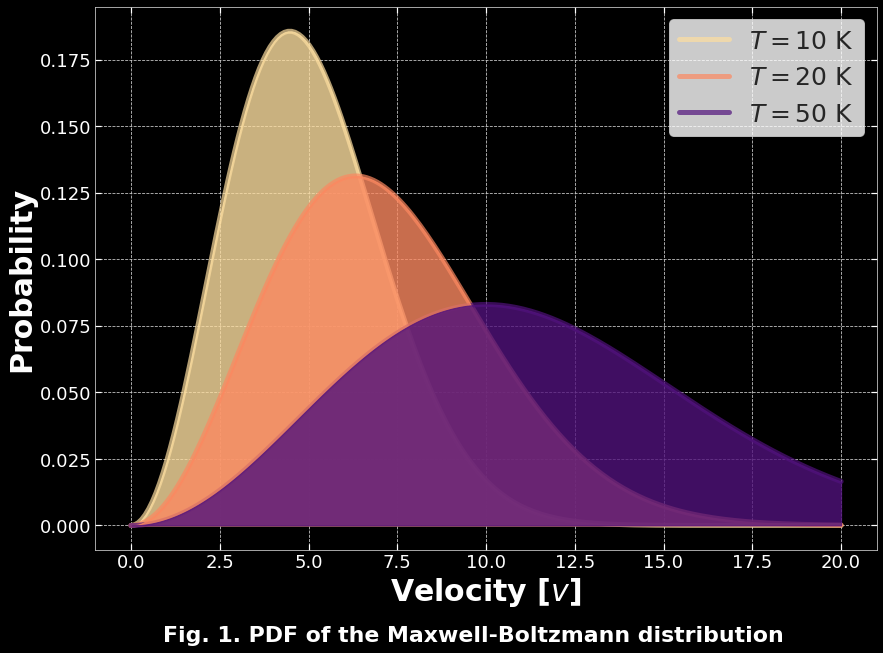

In [10]:
fig, axes = plt.subplots(figsize=(14,10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

colors = [cm.magma(0.25), cm.magma(0.75), cm.magma(0.93)][::-1]

for i, y in enumerate(y_pdf):
    axes.plot(X, y, label='$T = {}$ K'.format(Ts[i]),
              color=colors[i], lw=5, alpha=0.7)
    axes.fill_between(X, y1=y,
                      color=colors[i], alpha=0.8, zorder=i+2)

axes.set_xlabel('Velocity [$v$]', fontsize=axislabelsize, fontweight='bold',
                color='white')
axes.set_ylabel('Probability', fontsize=axislabelsize, fontweight='bold',
                color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize,
                 colors='white')

axes.legend(loc='upper right', fontsize=axislegendsize)

plt.suptitle('Fig. 1. PDF of the Maxwell-Boltzmann distribution',
             color='white', fontsize=axistitlesize, fontweight='bold', y=0.02)

plt.show()

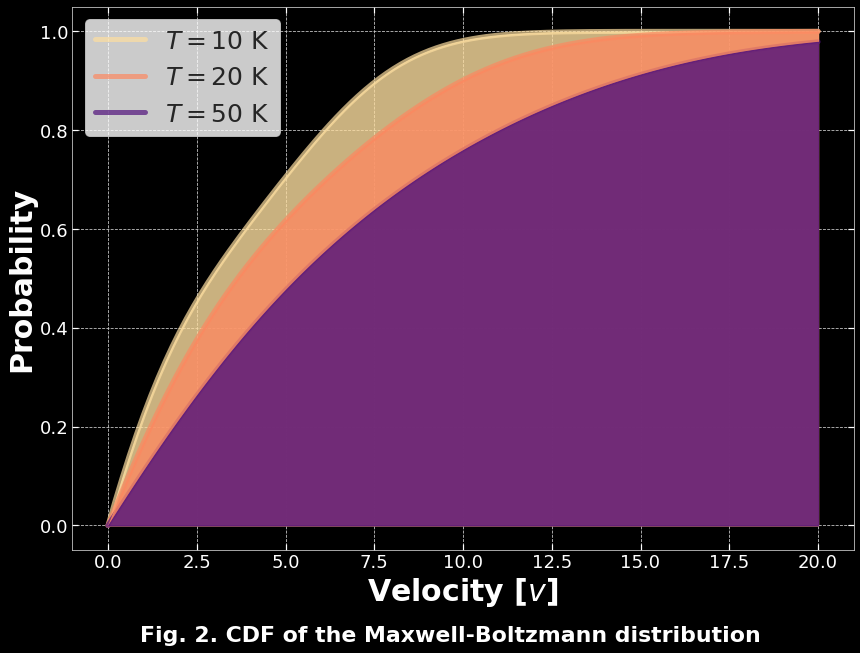

In [11]:
fig, axes = plt.subplots(figsize=(14,10),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

colors = [cm.magma(0.25), cm.magma(0.75), cm.magma(0.93)][::-1]

for i, y in enumerate(y_cdf):
    axes.plot(X, y, label='$T = {}$ K'.format(Ts[i]),
              color=colors[i], lw=5, alpha=0.7)
    axes.fill_between(X, y1=y,
                      color=colors[i], alpha=0.8, zorder=i+2)

axes.set_xlabel('Velocity [$v$]', fontsize=axislabelsize, fontweight='bold',
                color='white')
axes.set_ylabel('Probability', fontsize=axislabelsize, fontweight='bold',
                color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize,
                 colors='white')

axes.legend(loc='upper left', fontsize=axislegendsize)

plt.suptitle('Fig. 2. CDF of the Maxwell-Boltzmann distribution',
             color='white', fontsize=axistitlesize, fontweight='bold', y=0.02)

plt.show()